# Making animations using moviepy

http://zulko.github.io/blog/2014/11/29/data-animations-with-python-and-moviepy/

http://zulko.github.io/moviepy/

In [1]:
%matplotlib inline

[MoviePy] >>>> Building video sinc_mpl.mp4
[MoviePy] Writing video sinc_mpl.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: sinc_mpl.mp4 



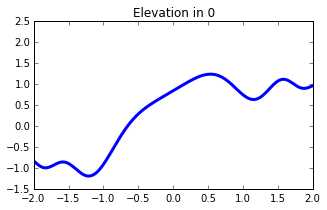

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in 0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.write_videofile("sinc_mpl.mp4", fps=20)